<div style="text-align: center; background-color:rgb(32, 5, 129); padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 40px; font-weight: bold;">Build and optimize forecasting models to predict future sales</span>
</div>

**Car Sales Forecasting**
- Since our target column is **Price ($)**, which is a numeric/continuous value, our problem is a regression problem.
- we're trying to predict the future sale **price** of a car based on features like model, body style, engine type, etc. That’s a classic regression task.
  ---
**Evaluation Metrics:**

**R² (R-squared)** – to see how well the model explains the variance

**MAE / RMSE** – to see how close the predictions are to the actual prices  
- The mean best accuracy and best parameters got through the grid search CV
- The model performance metrics Accuracy, Precision, Recall and F1 Score
- The model Classification scores by classes
- The prediction confusion matrix
- The ROC AUC Score and the ROC Curve
--- 
models are: 

1. Random Forest
2. XGBoost
3. Decision Tree
4. Prophet (python 3.10 )

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go
import joblib
import time
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import graphviz

# **Load a dataset**
- Split the dataset into training and test sets, ensuring proper time-series validation techniques
- Use the `train_test_split` function from the `sklearn.model_selection` module to split the dataset into training and test sets. 

In [2]:
cars_sales_Model = joblib.load('dataPreprocessing.pkl')

In [3]:
cars_sales_Model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23089 entries, 0 to 23089
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  23089 non-null  datetime64[ns]
 1   Gender                23089 non-null  int64         
 2   Annual Income         23089 non-null  float64       
 3   Company               23089 non-null  int64         
 4   Engine                23089 non-null  int64         
 5   Transmission          23089 non-null  int64         
 6   Color                 23089 non-null  int64         
 7   Price ($)             23089 non-null  float64       
 8   Body Style            23089 non-null  int64         
 9   Dealer_Region         23089 non-null  int64         
 10  Year                  23089 non-null  int64         
 11  Month                 23089 non-null  int64         
 12  DayOfWeek             23089 non-null  int64         
 13  Season               

In [4]:
cars_sales_Model.shape

(23089, 28)

# **Spilit the dataset**

- The `cars_sales_Model` dataset contains features and target variables for a car sales dataset.
- x is the features and y is the target variable(**price ($)**).
  

In [5]:
# Define features (X) and target (y)
x = cars_sales_Model.drop(columns=['Price ($)','Date'])
y = cars_sales_Model['Price ($)']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18471, 26)
(4618, 26)
(18471,)
(4618,)


# **Model Selection**
- The process of choosing the best model for a given problem. This involves evaluating th

## **decision tree**
- A decision tree is a type of machine learning model that uses a tree-like structure to make predictions. It works by recursively splitting the data into smaller subsets based on features and their values, and then making predictions based on the majority class in each subset.

In [7]:
Decision_Tree_Regressor= DecisionTreeRegressor(random_state=42)

## **random forest**
- A Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. It works by creating multiple decision trees on different subsets of the data and then combining their predictions to make final predictions. 

In [8]:
Random_Forest_Regressor= RandomForestRegressor(n_estimators=100, random_state=42)

## **XGBoost**
- is a library for gradient boosting, a type of ensemble learning.
  

In [9]:
XGBoost_Regressor=XGBRegressor(n_estimators=120, learning_rate=0.1, max_depth=5, random_state=42)

## **Gradient Boosting**
- Gradient Boosting is an ensemble learning method that combines multiple weak learners to improve the accuracy and robustness of predictions.

In [10]:

Gradient_Boosting_Regressor=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

## **Support Vector Regression (SVR)** 
- SVR is a regression version of SVM. It is used for regression tasks where the goal is to predict a continuous output variable. SVR uses a similar approach to SVM but with a different loss function and a different set of hyperparameters.

In [11]:
# Create pipeline with StandardScaler and SVR
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))

# **Model Training**
- The model architecture used is a simple feedforward neural network with one hidden layer.
-  Split the dataset into training and test sets, ensuring proper time-series validation techniques
-  Train multiple models and assess their performance using error metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error).

## **decision tree** 

In [12]:
print("training Decision Tree...")
start_time_dt = time.time()

Decision_Tree_Regressor.fit(X_train, y_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))


training Decision Tree...


Decision Tree trained in 2.48 seconds


In [13]:
# Predict on the test set
print("training Predicting Decision Tree...")
start_time_Dpred = time.time()

y_pred_tree_test = Decision_Tree_Regressor.predict(X_test)
y_pred_tree_train = Decision_Tree_Regressor.predict(X_train)

end_time_Dpred = time.time()
print("Decision Tree trained pridiction in {:.2f} seconds".format(end_time_Dpred - start_time_Dpred))

training Predicting Decision Tree...
Decision Tree trained pridiction in 0.05 seconds


## **random forest**

In [14]:
print("training Random Forest...")
start_time_rf = time.time()

Random_Forest_Regressor.fit(X_train, y_train)

end_time_rf = time.time()
print("Random Forest trained in {:.2f} seconds".format(end_time_rf - start_time_rf))


training Random Forest...
Random Forest trained in 105.92 seconds


In [15]:
# Predict on the test set
print("training Predicting Random Forest...")
start_time_rfpred = time.time()

y_pred_rf_test = Random_Forest_Regressor.predict(X_test)
y_pred_rf_train = Random_Forest_Regressor.predict(X_train)

end_time_rfpred = time.time()
print(" random forest trained pridiction in {:.2f} seconds".format(end_time_rfpred - start_time_rfpred))

training Predicting Random Forest...


 random forest trained pridiction in 3.89 seconds


## **XGBoost**

In [16]:
print("training XGBoost...")
start_time_xb = time.time()

XGBoost_Regressor.fit(X_train, y_train)

end_time_xb = time.time()
print("xgboost trained in {:.2f} seconds".format(end_time_xb - start_time_xb))


training XGBoost...


xgboost trained in 3.27 seconds


In [17]:
# Predict on the test set
print("training Predicting xgboost...")
start_time_xbpred = time.time()

y_pred_xb_test= XGBoost_Regressor.predict(X_test)
y_pred_xb_train= XGBoost_Regressor.predict(X_train)

end_time_xbpred = time.time()
print("xgboost trained pridiction in {:.2f} seconds".format(end_time_xbpred - start_time_xbpred))

training Predicting xgboost...
xgboost trained pridiction in 0.25 seconds


## **Gradient Boosting**

In [18]:
print("training Gradient Boosting...")
start_time_gb = time.time()

Gradient_Boosting_Regressor.fit(X_train, y_train)

end_time_gb = time.time()
print("Gradient Boost trained in {:.2f} seconds".format(end_time_gb - start_time_gb))

training Gradient Boosting...
Gradient Boost trained in 28.42 seconds


In [19]:
print("training Predicting Gradient Boost...")
start_time_gbpred = time.time()

y_pred_gb_test= Gradient_Boosting_Regressor.predict(X_test)
y_pred_gb_train= Gradient_Boosting_Regressor.predict(X_train)

end_time_gbpred = time.time()
print(" Gradient Boost trained pridiction in {:.2f} seconds".format(end_time_gbpred - start_time_gbpred))

training Predicting Gradient Boost...
 Gradient Boost trained pridiction in 0.32 seconds


# **Model Evaluation and Tuning**
- Tune hyperparameters for selected models.
- Evaluate residuals to ensure that no patterns are left unmodeled.


## healper functions

In [20]:
def print_regression_metrics(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Results:")
        print(f"R-squared: {r2_score(y_train, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        accuracy = np.mean(np.abs((y_train - pred) / y_train) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")
        
    else:
        pred = clf.predict(X_test)
        print("Test Results:")
        print(f"R-squared: {r2_score(y_test, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        accuracy = np.mean(np.abs((y_test - pred) / y_test) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")


In [21]:
def plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted'):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
    plt.xlabel("Actual Car Sales")
    plt.ylabel("Predicted Car Sales")
    plt.title(title)
    plt.show()

In [22]:
def plot_residuals(y_test, y_pred, title='Residual Plot'):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()
    
    # Also, residuals vs. predicted values:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Car Sales")
    plt.ylabel("Residual")
    plt.title(title + " (vs. predicted)")
    plt.show()

## **decision tree**

In [23]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=False)


Train Results:
R-squared: 1.0
Mean Absolute Error: 1.0000780390025975e-16
Mean Squared Error: 1.1169518994078724e-31
Root Mean Squared Error: 3.3420830321939526e-16
Accuracy-like Measure (within 10%): 100.00%
Test Results:
R-squared: 0.9885806758238408
Mean Absolute Error: 0.029740484294484375
Mean Squared Error: 0.011571189852049012
Root Mean Squared Error: 0.10756946524013686
Accuracy-like Measure (within 10%): 85.79%


In [24]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 30]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [25]:
final_model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=30)

# Evaluate final model on the test set
print("training Decision Tree...")
start_time_dt = time.time()

final_model.fit(X_train, y_train)
final_pred_test = final_model.predict(X_test)
final_pred_train = final_model.predict(X_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))

training Decision Tree...
Decision Tree trained in 1.10 seconds


In [26]:
# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=False)


Train Results:
R-squared: 0.9914911849823714
Mean Absolute Error: 0.03759392117621209
Mean Squared Error: 0.008480053231468374
Root Mean Squared Error: 0.09208720449372092
Accuracy-like Measure (within 10%): 78.59%
Test Results:
R-squared: 0.9821369067334592
Mean Absolute Error: 0.05239875705375327
Mean Squared Error: 0.018100654674777967
Root Mean Squared Error: 0.13453867352838725
Accuracy-like Measure (within 10%): 73.24%


In [27]:
k = 5

# Apply k-fold cross-validation to the model
cv_scores = cross_val_score(final_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
rmse_scores = np.sqrt(-cv_scores)

# Print results
print(f"Cross-Validation RMSE for each fold: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.2f}")
print(f"Standard Deviation of RMSE: {rmse_scores.std():.2f}")


Cross-Validation RMSE for each fold: [0.11842708 0.13621913 0.14935425 0.11275885 0.12463371]
Mean RMSE: 0.13
Standard Deviation of RMSE: 0.01


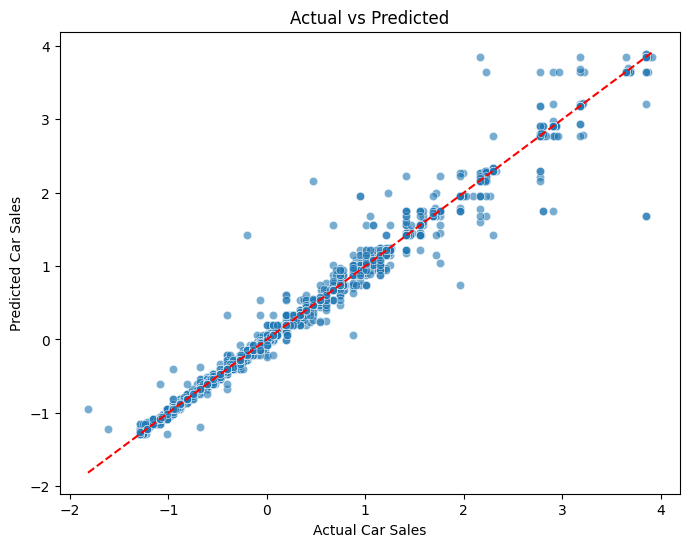

In [28]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_tree_test)


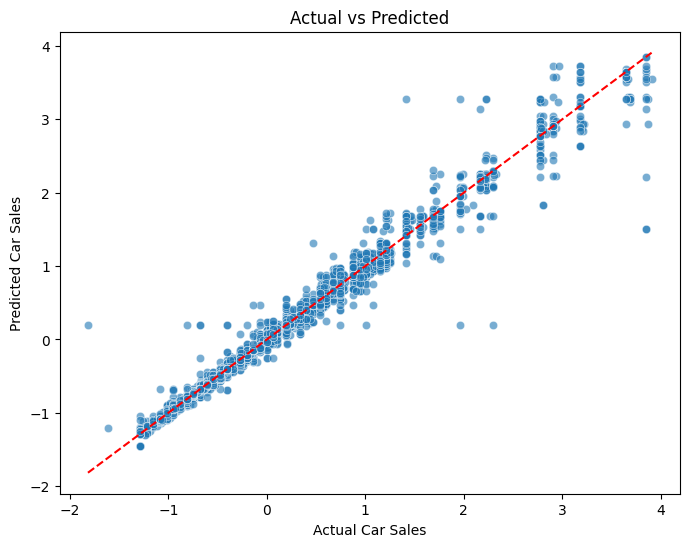

In [29]:
plot_actual_vs_predicted(y_test=y_test, y_pred=final_pred_test)

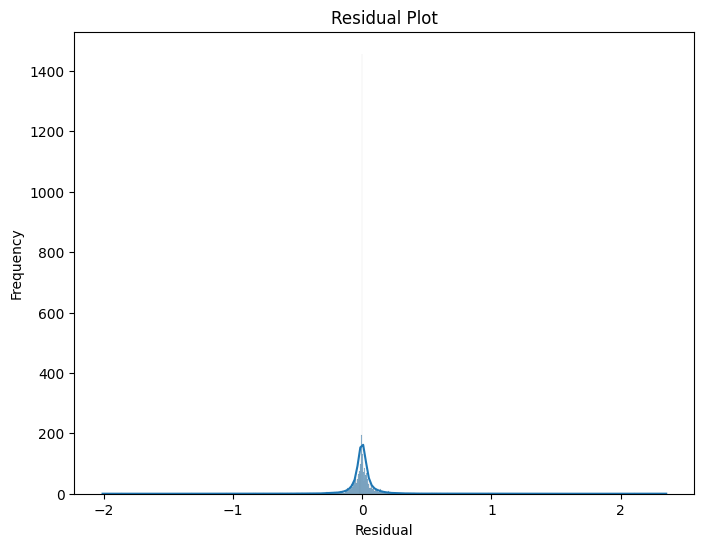

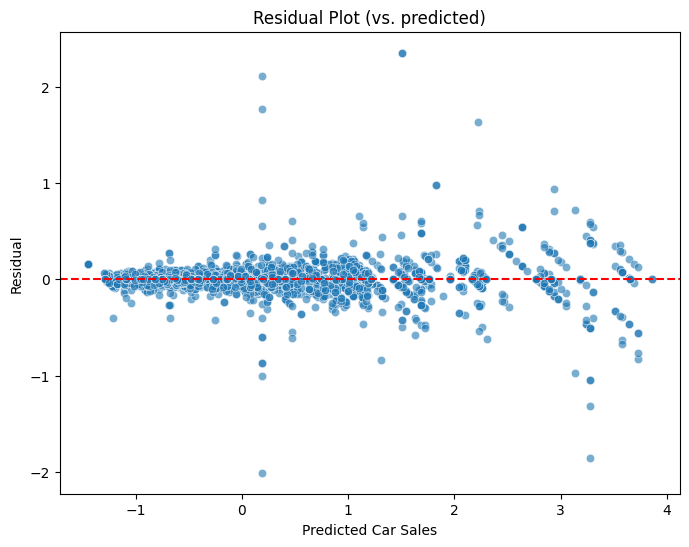

In [30]:
plot_residuals(y_test=y_test, y_pred=final_pred_test)


## Random Forest

In [31]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9996046766330362
Mean Absolute Error: 0.00597713164550613
Mean Squared Error: 0.0003939870814620967
Root Mean Squared Error: 0.0198491078253431
Accuracy-like Measure (within 10%): 97.26%
Test Results:
R-squared: 0.997345067358596
Mean Absolute Error: 0.0147442636776899
Mean Squared Error: 0.0026902406100550863
Root Mean Squared Error: 0.05186752943851371
Accuracy-like Measure (within 10%): 92.75%


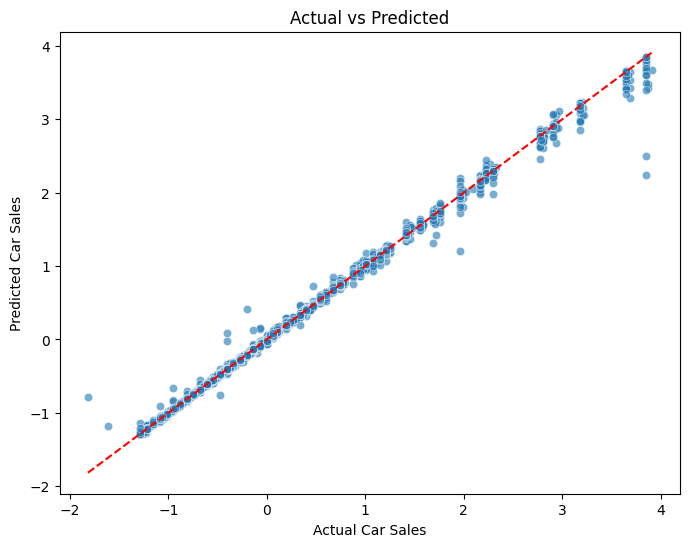

In [32]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_rf_test)


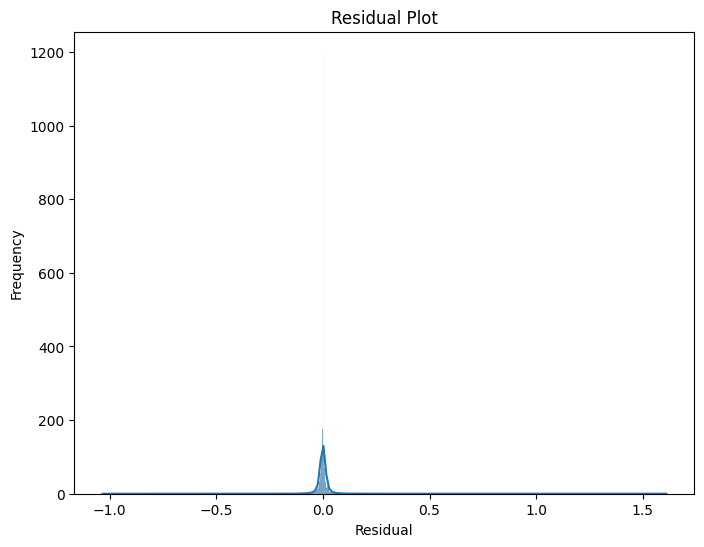

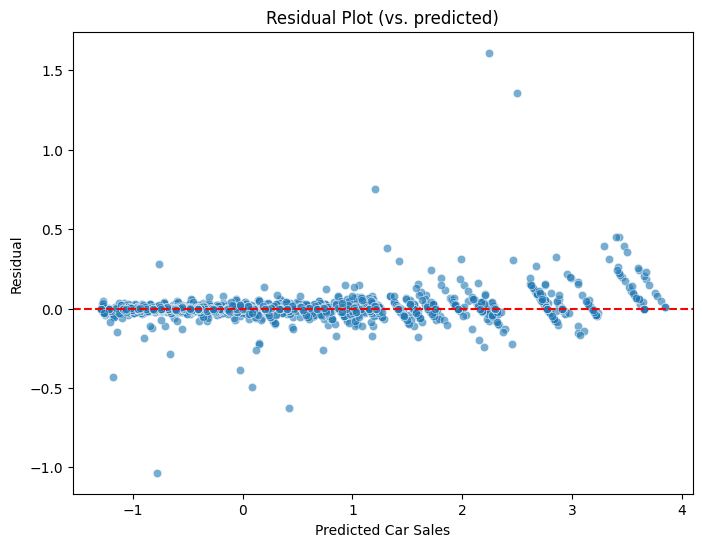

In [33]:
plot_residuals(y_test=y_test, y_pred=y_pred_rf_test)

## ****XGBoost****

In [34]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.997078012357057
Mean Absolute Error: 0.029902809108089505
Mean Squared Error: 0.0029121106408487203
Root Mean Squared Error: 0.05396397539885957
Accuracy-like Measure (within 10%): 82.42%
Test Results:
R-squared: 0.9959398760451303
Mean Absolute Error: 0.033620232868910145
Mean Squared Error: 0.004114119573094523
Root Mean Squared Error: 0.06414140295545867
Accuracy-like Measure (within 10%): 81.01%


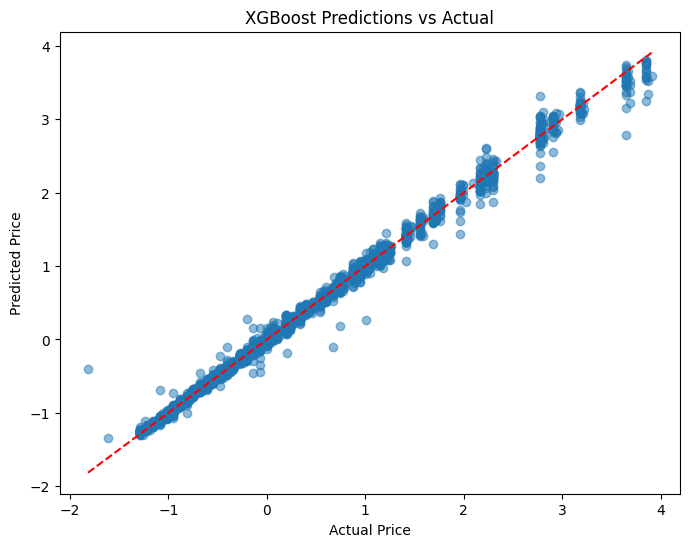

In [35]:

# XGBoost predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xb_test, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()

In [36]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_xb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples for training each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features for training each tree
}

random_search = RandomizedSearchCV(XGBoost_Regressor, param_distributions=param_grid_xb, n_iter=30, 
                                   cv=5, n_jobs=-1, verbose=3)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=120,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=3)

In [37]:
print_regression_metrics(random_search, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(random_search, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9997869729074718
Mean Absolute Error: 0.009937525614433318
Mean Squared Error: 0.00021230701109872118
Root Mean Squared Error: 0.01457075876880546
Accuracy-like Measure (within 10%): 93.04%
Test Results:
R-squared: 0.9972210554191837
Mean Absolute Error: 0.02223375579336977
Mean Squared Error: 0.002815901785158312
Root Mean Squared Error: 0.05306507123483688
Accuracy-like Measure (within 10%): 87.25%


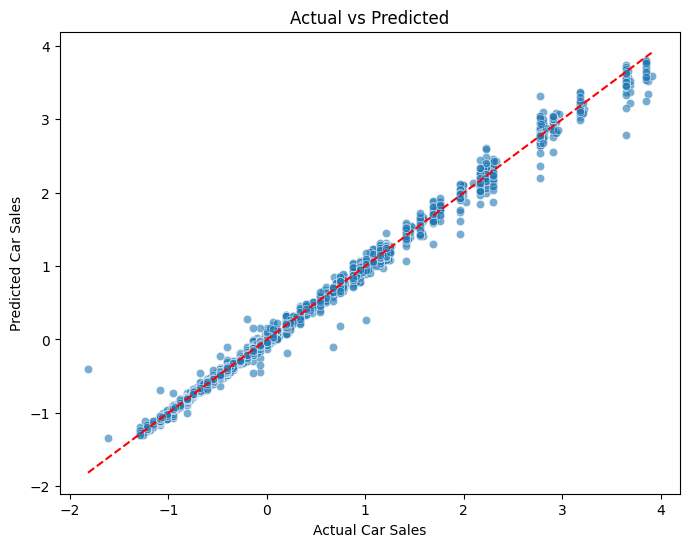

In [38]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_xb_test)


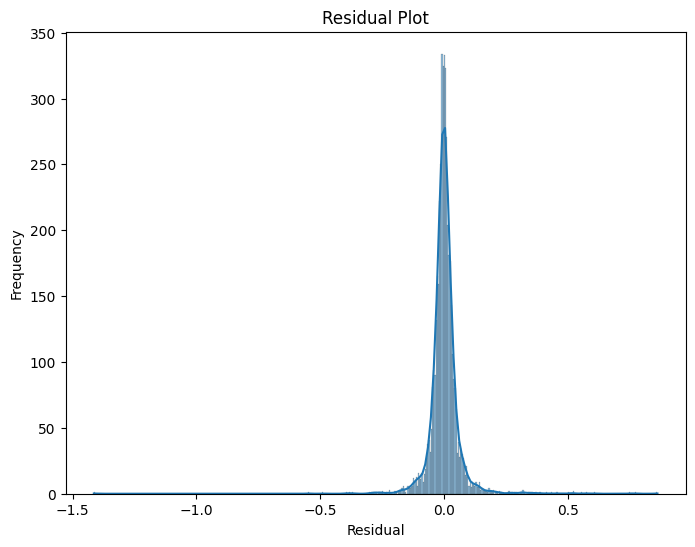

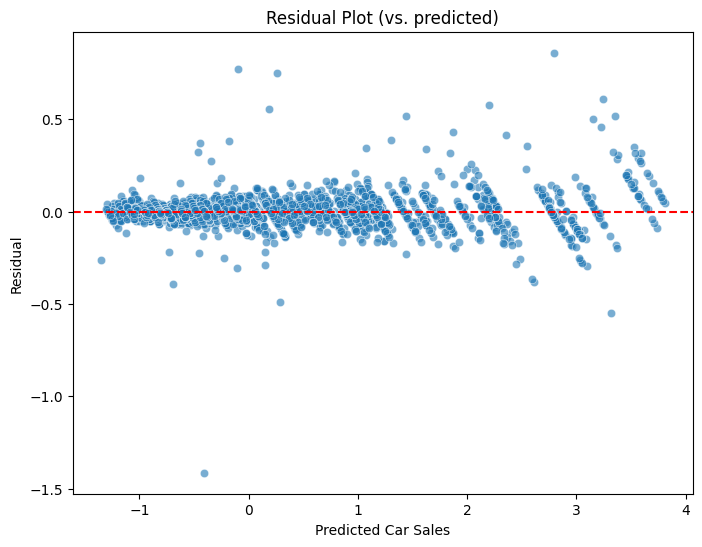

In [39]:
plot_residuals(y_test=y_test, y_pred=y_pred_xb_test)


## **Gradient Boosting**

In [40]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Gradient_Boosting_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Gradient_Boosting_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9986060076838724
Mean Absolute Error: 0.02475446404717843
Mean Squared Error: 0.0013892802958494577
Root Mean Squared Error: 0.03727305053050337
Accuracy-like Measure (within 10%): 83.80%
Test Results:
R-squared: 0.9976782146201689
Mean Absolute Error: 0.02914564578812643
Mean Squared Error: 0.0023526628206094915
Root Mean Squared Error: 0.04850425569586128
Accuracy-like Measure (within 10%): 81.62%


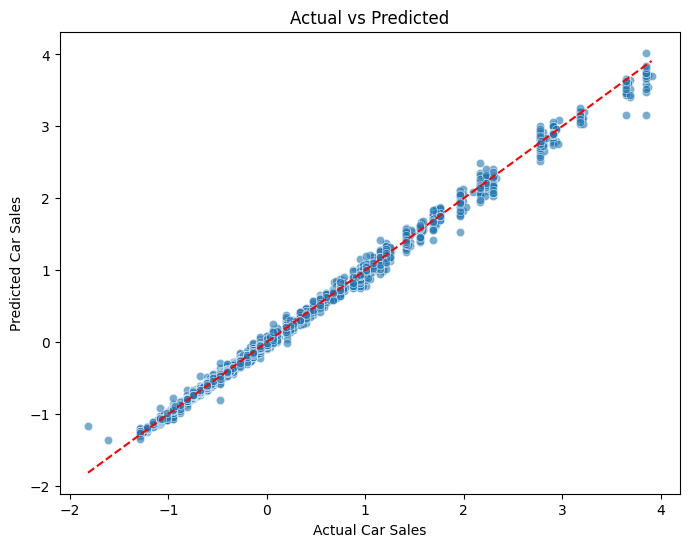

In [41]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_gb_test)   


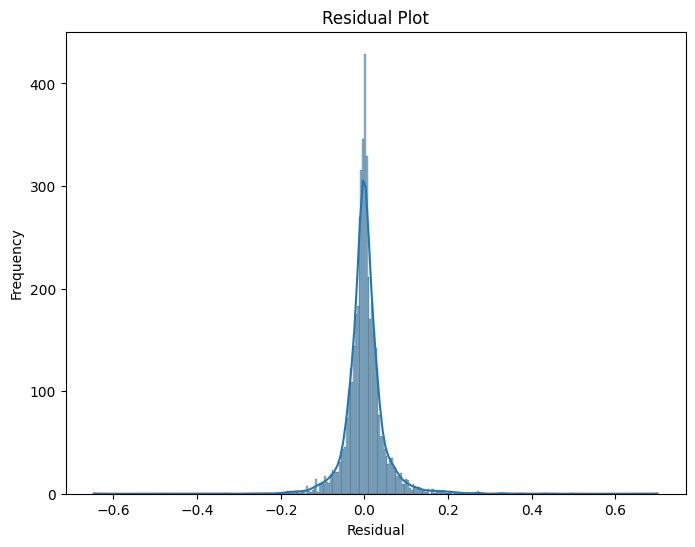

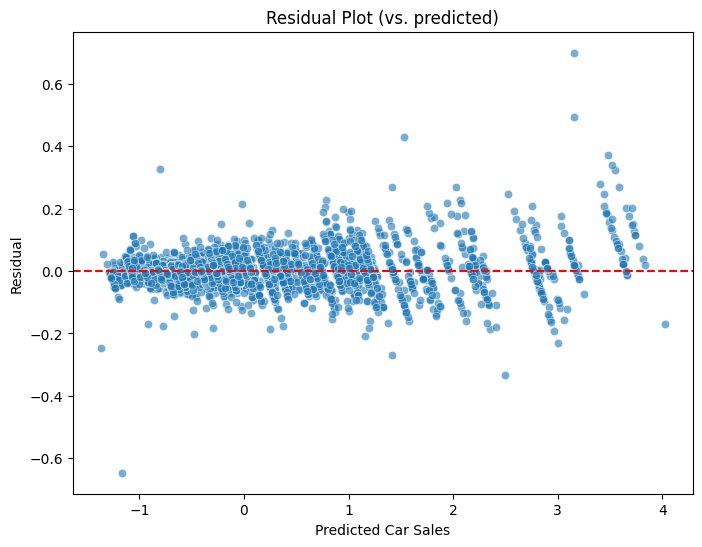

In [42]:
plot_residuals(y_test=y_test, y_pred=y_pred_gb_test)

# **Comparison and Best Model**
- Compare the models' performance and choose the best-performing model based on evaluation metrics.


In [44]:
results = {
    'Model': ['Gradient Boost', 'Decision Tree', 'XGBoost', 'Random Forest' ],
    
    'R² Train': [
        r2_score(y_train, y_pred_gb_train),
        r2_score(y_train, final_pred_train),
        r2_score(y_train, y_pred_xb_train),
        r2_score(y_train, y_pred_rf_train)
    ],
    
    'R² Test': [
        r2_score(y_test, y_pred_gb_test),
        r2_score(y_test, final_pred_test),
        r2_score(y_test, y_pred_xb_test),
        r2_score(y_test, y_pred_rf_test)
    ],
    
    'MAE Train': [
        mean_absolute_error(y_train, y_pred_gb_train),
        mean_absolute_error(y_train, final_pred_train),
        mean_absolute_error(y_train, y_pred_xb_train),
        mean_absolute_error(y_train, y_pred_rf_train)
    ],
    
    'MAE Test': [
        mean_absolute_error(y_test, y_pred_gb_test),
        mean_absolute_error(y_test, final_pred_test),
        mean_absolute_error(y_test, y_pred_xb_test),
        mean_absolute_error(y_test, y_pred_rf_test)
    ],
    
    'RMSE Train': [
        np.sqrt(mean_squared_error(y_train, y_pred_gb_train)),
        np.sqrt(mean_squared_error(y_train, final_pred_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_xb_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
    ],
    
    'RMSE Test': [
        np.sqrt(mean_squared_error(y_test, y_pred_gb_test)),
        np.sqrt(mean_squared_error(y_test, final_pred_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_xb_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
    ],
    'Time Train': [
        end_time_gb - start_time_gb,
        end_time_dt - start_time_dt,
        end_time_xb - start_time_xb,
        end_time_rf - start_time_rf
    ],
}

# Create and display the DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
print(results_df)


                R² Train   R² Test  MAE Train  MAE Test  RMSE Train  \
Model                                                                 
Gradient Boost  0.998606  0.997678   0.024754  0.029146    0.037273   
Decision Tree   0.991491  0.982137   0.037594  0.052399    0.092087   
XGBoost         0.997078  0.995940   0.029903  0.033620    0.053964   
Random Forest   0.999605  0.997345   0.005977  0.014744    0.019849   

                RMSE Test  Time Train  
Model                                  
Gradient Boost   0.048504   28.417036  
Decision Tree    0.134539    1.102761  
XGBoost          0.064141    3.272122  
Random Forest    0.051868  105.922364  


In [45]:
results_df.sort_values(by='R² Train', ascending=True, inplace=False)


,R² Train,R² Test,MAE Train,MAE Test,RMSE Train,RMSE Test,Time Train
Model,,,,,,,
Decision Tree,0.991491,0.982137,0.037594,0.052399,0.092087,0.134539,1.102761
XGBoost,0.997078,0.995940,0.029903,0.033620,0.053964,0.064141,3.272122
Gradient Boost,0.998606,0.997678,0.024754,0.029146,0.037273,0.048504,28.417036
Random Forest,0.999605,0.997345,0.005977,0.014744,0.019849,0.051868,105.922364


In [47]:

reg_models = {
    'Decision Tree': Decision_Tree_Regressor,
    'Random Forest': Random_Forest_Regressor,
    'XGBoost': XGBoost_Regressor,
    'Gradient Boosting': Gradient_Boosting_Regressor
}
scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'mape': make_scorer(mean_absolute_percentage_error)
}


regression_results = {}

for name, model in reg_models.items():
    scores = cross_validate(model, x, y, cv=5, scoring=scoring)
    regression_results[name] = {
        'R2 Mean': scores['test_r2'].mean(),
        'MSE Mean': scores['test_mse'].mean(),
        'MAE Mean': scores['test_mae'].mean(),
        'MAPE Mean': scores['test_mape'].mean()
    }


for model, metrics in regression_results.items():
    print(f"\n Model: {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
cros_results = pd.DataFrame(regression_results)



 Model: Decision Tree
R2 Mean: 0.9906
MSE Mean: 0.0094
MAE Mean: 0.0279
MAPE Mean: 0.1753

 Model: Random Forest
R2 Mean: 0.9973
MSE Mean: 0.0027
MAE Mean: 0.0147
MAPE Mean: 0.0588

 Model: XGBoost
R2 Mean: 0.9954
MSE Mean: 0.0045
MAE Mean: 0.0341
MAPE Mean: 0.1999

 Model: Gradient Boosting
R2 Mean: 0.9973
MSE Mean: 0.0027
MAE Mean: 0.0300
MAPE Mean: 0.1832


In [48]:
print(cros_results)

           Decision Tree  Random Forest   XGBoost  Gradient Boosting
R2 Mean         0.990566       0.997299  0.995441           0.997250
MSE Mean        0.009403       0.002697  0.004534           0.002744
MAE Mean        0.027909       0.014710  0.034148           0.030013
MAPE Mean       0.175261       0.058820  0.199850           0.183241


In [49]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

print(y_pred_gb_test.shape)
print(y_pred_tree_test.shape)
print(y_pred_xb_test.shape)
print(y_pred_rf_test.shape)

print(y_pred_gb_train.shape)
print(y_pred_tree_train.shape)  
print(y_pred_xb_train.shape)
print(y_pred_rf_train.shape)

print(cros_results.shape)


(4618, 26)
(4618,)
(18471, 26)
(18471,)
(4618,)
(4618,)
(4618,)
(4618,)
(18471,)
(18471,)
(18471,)
(18471,)
(4, 4)


In [50]:
def plot_learning_curve(model, X, y, title='Learning Curve', ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

def plot_dashboard(y_test, y_pred, model_name='Model'):

    residuals = y_test - y_pred

    # ---- Dashboard ----
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))

    # Plot: Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axs, alpha=0.5)
    axs.axhline(0, color='red', linestyle='--')
    axs.set_title(f'Residual Plot: {model_name}')
    axs.set_xlabel('Predicted Values')
    axs.set_ylabel('Residuals')
    axs.grid(True)

    plt.tight_layout()
    plt.show()


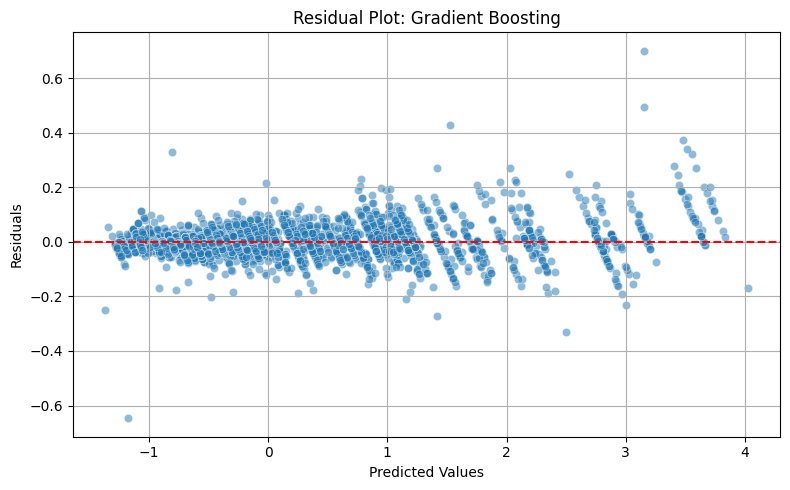

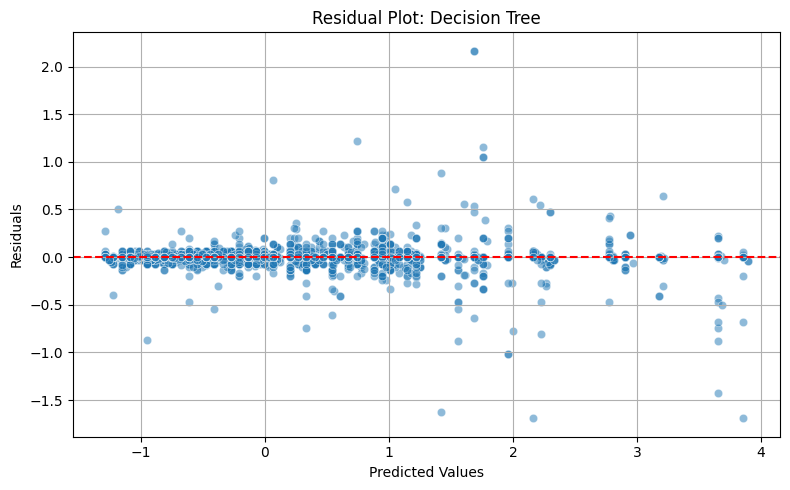

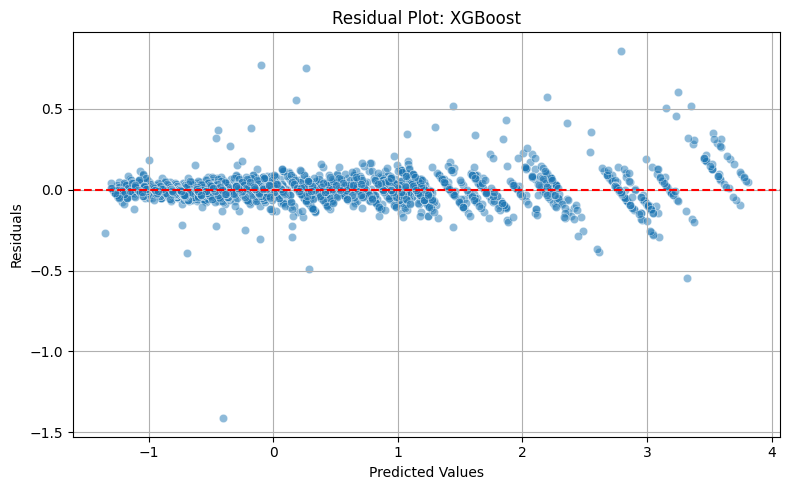

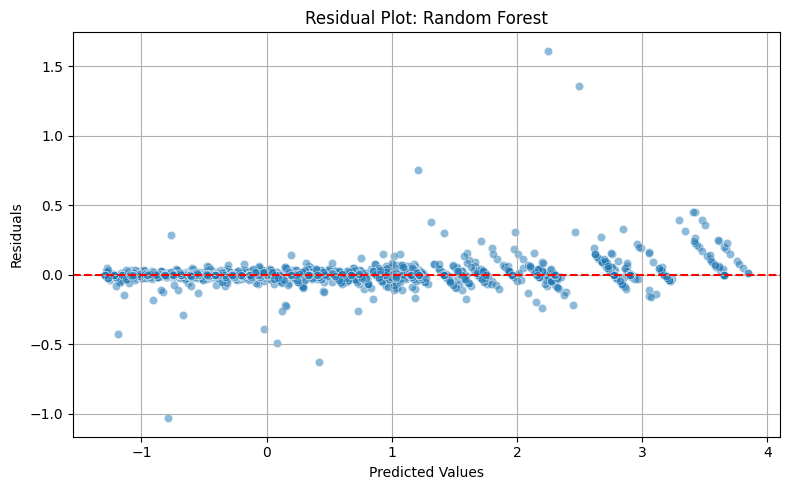

In [51]:
plot_dashboard(y_test, y_pred_gb_test, model_name='Gradient Boosting')
plot_dashboard(y_test, y_pred_tree_test, model_name='Decision Tree')
plot_dashboard(y_test, y_pred_xb_test, model_name='XGBoost')
plot_dashboard(y_test, y_pred_rf_test, model_name='Random Forest')



# **Save the best model**

In [53]:
joblib.dump(Random_Forest_Regressor, 'Random_Forest_Regressor.pkl')
joblib.dump(XGBoost_Regressor, 'XGBoost_Regressor.pkl')
joblib.dump(Gradient_Boosting_Regressor, 'Gradient_Boosting_Regressor.pkl')
joblib.dump(final_model, 'Desision_tree_Regressor.pkl')

['Desision_tree_Regressor.pkl']

# **Final Conclusion: Best Model and Justification**
**Best Model: Random Forest (RF)**
Why Random Forest is the Best Overall:

**Highest Accuracy:**
Random Forest achieves the highest R² of 0.9973, indicating that it explains the most variance in the target variable compared to other models. This makes it the most accurate model in terms of predicting your dataset.

**Lowest Error Metrics:**
Random Forest has the lowest MAE (0.0147) and MAPE (0.0588), which means it makes fewer errors in its predictions and has the most consistent accuracy. Additionally, it ties for the lowest MSE (0.0027), further reinforcing its precision.

**Stable Performance:**
Random Forest consistently outperforms other models across multiple folds during cross-validation, demonstrating its robust generalization ability. This suggests it performs reliably on unseen data, avoiding overfitting and underfitting.

**Feature Importance:**
Random Forest also provides valuable insights into feature importance, which is useful for understanding which features have the most impact on predictions. This can be crucial for decision-making, especially in applications where model interpretability is important.

**Trade-Off: Gradient Boosting (GB)**
While Random Forest is the best for accuracy and generalization, Gradient Boosting offers an excellent trade-off between performance and speed. It performs almost identically to Random Forest in terms of R² (0.9973) and MSE (0.0027), but with slightly higher error metrics (MAE and MAPE).

**Why choose Gradient Boosting?**

It offers much faster training times (28 seconds vs. 105 seconds for RF), making it more suitable for scenarios where model retraining needs to be done frequently.

For production environments where speed is critical, Gradient Boosting is a strong contender while maintaining near-identical performance to Random Forest.


# 


<head>
    <title>Team Credits</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color:rgba(23, 20, 20, 0.74);
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
        }
        .container {
            text-align: center;
            background-color:rgb(4, 88, 140);
            padding: 40px;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            max-width: 1100px;
            width: 100%;
        }
        h1 {
            color: #333;
            font-size: 2.5em;
            margin-bottom: 10px;
        }
        h3 {
            color: #333;
            font-size: 1.5em;
            margin: 20px 0;
        }
        ul {
            list-style: none;
            padding: 0;
            margin: 20px 0;
        }
        ul li {
            font-size: 1.2em;
            margin: 10px 0;
        }
        ul li a {
            color: #333;
            text-decoration: none;
            transition: color 0.3s;
        }
        ul li a:hover {
            color: #007bff;
        }
        .github-section {
            margin-top: 30px;
        }
        .github-section p {
            color: #333;
            font-size: 1.1em;
            margin-bottom: 10px;
        }
        .github-section a img {
            width: 50px;
            height: 50px;
            transition: transform 0.3s;
        }
        .github-section a img:hover {
            transform: scale(1.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Thank You for Your Time and Efforts!</h1>
        <h3>This Work Done By Our Team:</h3>
        <ul>
            <li><a href="https://github.com/youssef-113" target="_blank">Youssef Bassiony Abdlah</a></li>
            <li><a href="https://github.com/AhmedGamall-1" target="_blank">Ahmed Gamall</a></li>
            <li><a href="https://github.com/Begad" target="_blank">Begad Abdelghafar</a></li>
            <li><a href="https://github.com/MustafaNasser005" target="_blank">Mustafa Nasser</a></li>
            <li><a href="https://github.com/mohamedamr21c" target="_blank">Mohammed Amr </a></li>
        </ul>
        <div class="github-section">
            <p>For GitHub Repository</p>
            <a href="https://github.com/AhmedGamall-1/Sales-forcasting-and-optmization/tree/main" title="Redirect to GitHub" target="_blank">
                <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="GitHub">
            </a>
        </div>

</body>
